## Pregunta: V5 - ¿Han desaparecido paquetes? ¿Han aparecido nuevos paquetes? 
Si jugamos con los paquetes que entran y salen podemos ver el tamaño que gana y pierde cada distro, cuanto peso ha ganado y cuanto peso ha perdido en cada versión.

### 1. Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Lectura

In [2]:
df = pd.read_csv("../../datawarehouse/processed-ubuntu-packages.csv")

### 3. Preprocesado

In [3]:
# replace value Null to NaN
df = df.replace("Null", np.nan)

# print head of dataframe
df.head()

,Distro-Version,Distro-Year,Package,Description,Section,Version,Architecture,Priority,Essential,Build-Essential,...,Original-Maintainer,Size,Installed-Size,Depends,Pre-Depends,Recommends,Conflicts,Suggests,Replaces,Provides
0,18.04 - bionic,2018,acct,Description,admin,6.6.4-1,amd64,optional,no,no,...,Debian,87216.0,297.0,"libc6 (>= 2.14), lsb-base",NaN,NaN,NaN,NaN,NaN,NaN
1,18.04 - bionic,2018,acl,Description,utils,2.2.52-3build1,amd64,optional,no,no,...,Anibal,38504.0,200.0,"libacl1 (= 2.2.52-3build1), libc6 (>= 2.14)",NaN,NaN,NaN,NaN,NaN,NaN
2,18.04 - bionic,2018,acpi-support,Description,admin,0.142,amd64,optional,no,no,...,Bart,10196.0,92.0,acpid (>= 1.0.4-1ubuntu4),NaN,"toshset, wireless-tools",uswsusp (<= 0.2),NaN,NaN,NaN
3,18.04 - bionic,2018,acpid,Description,admin,1:2.0.28-1ubuntu1,amd64,optional,no,no,...,Debian,36518.0,139.0,"libc6 (>= 2.15), init-system-helpers (>= 1.18~...",NaN,"toshset, wireless-tools",uswsusp (<= 0.2),NaN,NaN,NaN
4,18.04 - bionic,2018,adduser,Description,admin,3.116ubuntu1,all,important,no,yes,...,Debian,162684.0,624.0,"passwd, debconf (>= 0.5) | debconf-2.0",NaN,"toshset, wireless-tools",uswsusp (<= 0.2),"liblocale-gettext-perl, perl, ecryptfs-utils (...",NaN,NaN


### 4. Identificación de los paquetes de cada distro

In [4]:
# Get the size of packages for the 4 Ubuntu versions

bionic = df[df["Distro-Version"] == "18.04 - bionic"]
bionic = bionic[["Package", "Size", "Installed-Size"]]
bionic = bionic.reset_index(drop=True)

focal = df[df["Distro-Version"] == "20.04 - focal"]
focal = focal[["Package", "Size", "Installed-Size"]]
focal = focal.reset_index(drop=True)

jammy = df[df["Distro-Version"] == "22.04 - jammy"]
jammy = jammy[["Package", "Size", "Installed-Size"]]
jammy = jammy.reset_index(drop=True)

kinetic = df[df["Distro-Version"] == "22.10 - kinetic"]
kinetic = kinetic[["Package", "Size", "Installed-Size"]]
kinetic = kinetic.reset_index(drop=True)

### 5. Análisis
#### 5.1 Bionic a Focal

In [5]:
# Get the packages from bionic that are not in focal
bionic_removed_packages = bionic[~bionic["Package"].isin(focal["Package"])]
bionic_removed_packages = bionic_removed_packages.reset_index(drop=True)

# Get the packages from focal that are not in bionic
focal_new_packages = focal[~focal["Package"].isin(bionic["Package"])]
focal_new_packages = focal_new_packages.reset_index(drop=True)

print("-------------------------- Packages --------------------------")

# How many packages were removed from bionic to focal
print("How much packages were removed from bionic to focal? :", bionic_removed_packages.shape[0])

# How many packages were added from bionic to focal
print("How much packages were added from bionic to focal? :", focal_new_packages.shape[0])

# How many packages remained from bionic to focal
print("How many packages remained from bionic to focal? :", bionic.shape[0] - bionic_removed_packages.shape[0])

print("\n-------------------------- Size --------------------------")

# How much weight was removed from bionic to focal
print("How much weight was removed from bionic to focal? :", bionic_removed_packages["Installed-Size"].sum() // (1024 * 1024), "MB")

# How much weight was added from bionic to focal
print("How much weight was added from bionic to focal? :", focal_new_packages["Installed-Size"].sum() // (1024 * 1024), "MB")

# How much weight gain was there from bionic to focal
print("How much weight gain was there from bionic to focal? :", (focal_new_packages["Installed-Size"].sum() - bionic_removed_packages["Installed-Size"].sum()) // (1024 * 1024), "MB")

# Which is the average weight of the removed packages from bionic to focal
print("Which is the average weight of the removed packages from bionic to focal? :", bionic_removed_packages["Installed-Size"].mean() // (1024), "KB")

# Which is the average weight of the added packages from bionic to focal
print("Which is the average weight of the added packages from bionic to focal? :", focal_new_packages["Installed-Size"].mean() // (1024), "KB")

# Which is the average weight gain of the packages from bionic to focal
print("Which is the average weight gain of the packages from bionic to focal? :", (focal_new_packages["Installed-Size"].mean() - bionic_removed_packages["Installed-Size"].mean()) // (1024), "KB")

print("\n-------------------------- Check --------------------------")

# Do all this metrics make sense?
print("Do all this metrics make sense? :", ((focal_new_packages["Installed-Size"].mean() * focal_new_packages.shape[0]) - (bionic_removed_packages["Installed-Size"].mean() * bionic_removed_packages.shape[0])) // (1024 * 1024) == (focal_new_packages["Installed-Size"].sum() - bionic_removed_packages["Installed-Size"].sum()) // (1024 * 1024))

-------------------------- Packages --------------------------
How much packages were removed from bionic to focal? : 26213
How much packages were added from bionic to focal? : 24056
How many packages remained from bionic to focal? : 54424

-------------------------- Size --------------------------
How much weight was removed from bionic to focal? : 464.0 MB
How much weight was added from bionic to focal? : 580.0 MB
How much weight gain was there from bionic to focal? : 116.0 MB
Which is the average weight of the removed packages from bionic to focal? : 18.0 KB
Which is the average weight of the added packages from bionic to focal? : 24.0 KB
Which is the average weight gain of the packages from bionic to focal? : 6.0 KB

-------------------------- Check --------------------------
Do all this metrics make sense? : True


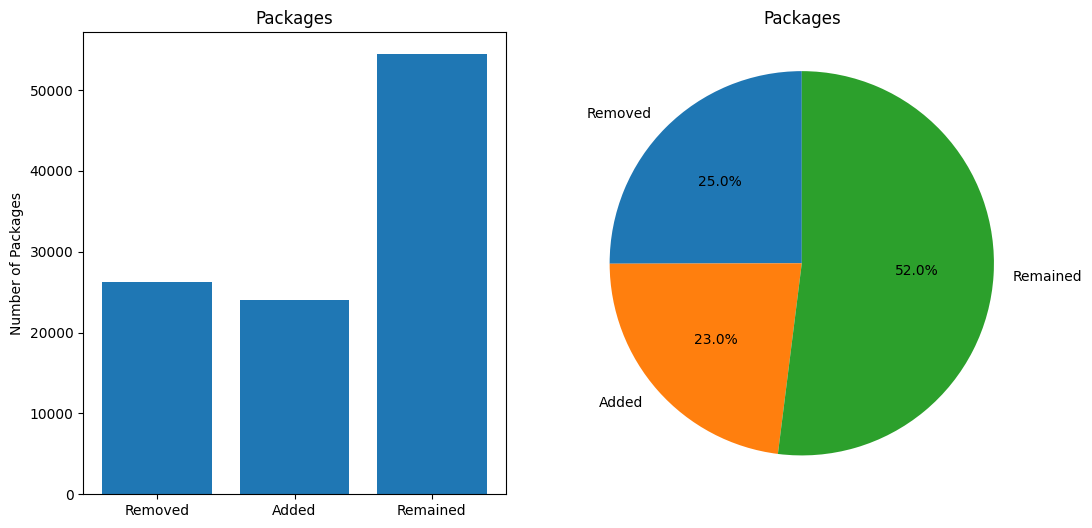

The biggest package from bionic is:  synphot-data , with size:  1.0 MB
The biggest package from focal is:  kicad-packages3d , with size:  4.0 MB


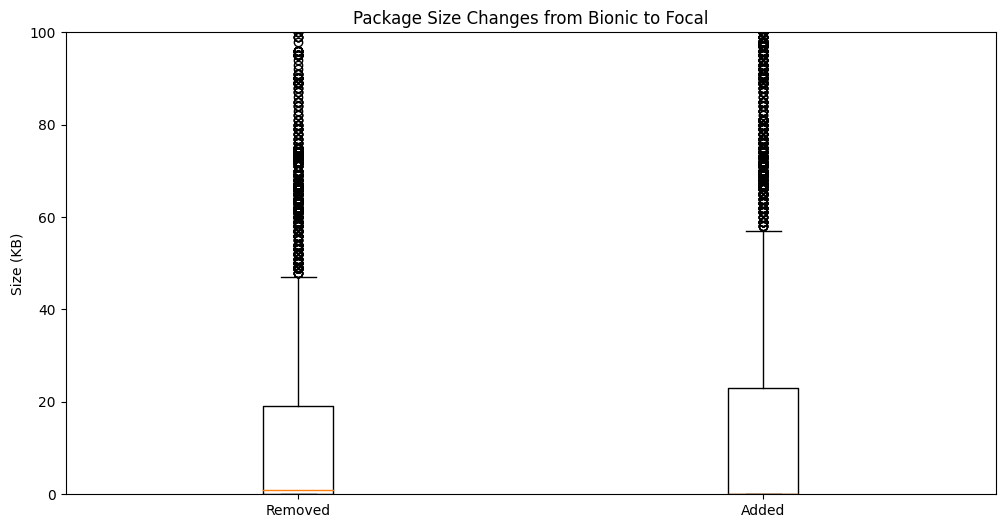

In [6]:
# Data
labels = ['Removed', 'Added', 'Remained']
sizes = [bionic_removed_packages.shape[0], focal_new_packages.shape[0], bionic.shape[0] - bionic_removed_packages.shape[0]]

# Bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(labels, sizes)
ax1.set_title('Packages')
ax1.set_ylabel('Number of Packages')

# Pie chart
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Packages')

plt.show()

# Prepare data
removed_package_sizes = bionic_removed_packages["Installed-Size"] // (1024)
added_package_sizes = focal_new_packages["Installed-Size"] // (1024)
package_size_data = [removed_package_sizes, added_package_sizes]

# Get the max size package name and size from bionic
bionic_max_size_package = bionic_removed_packages.loc[bionic_removed_packages["Installed-Size"].idxmax()]
print("The biggest package from bionic is: ", bionic_max_size_package["Package"], ", with size: ", bionic_max_size_package["Installed-Size"] // (1024 * 1024), "MB")

# Get the max size package name and size from focal
focal_max_size_package = focal_new_packages.loc[focal_new_packages["Installed-Size"].idxmax()]
print("The biggest package from focal is: ", focal_max_size_package["Package"], ", with size: ", focal_max_size_package["Installed-Size"] // (1024 * 1024), "MB")

# Create boxplot
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(package_size_data)
ax.set_title('Package Size Changes from Bionic to Focal')
ax.set_ylabel('Size (KB)')
ax.set_xticklabels(['Removed', 'Added'])

# Set y-axis limits
ax.set_ylim(bottom=0, top=100)

plt.show()

#### 5.2 Focal to Jammy

In [7]:
focal_removed_packages = focal[~focal["Package"].isin(jammy["Package"])]
focal_removed_packages = focal_removed_packages.reset_index(drop=True)

jammy_new_packages = jammy[~jammy["Package"].isin(focal["Package"])]
jammy_new_packages = jammy_new_packages.reset_index(drop=True)

print("-------------------------- Packages --------------------------")

print("How much packages were removed from focal to jammy? :", focal_removed_packages.shape[0])

print("How much packages were added from focal to jammy? :", jammy_new_packages.shape[0])

print("How many packages remained from focal to jammy? :", focal.shape[0] - focal_removed_packages.shape[0])

print("\n-------------------------- Size --------------------------")

print("How much weight was removed from focal to jammy? :", focal_removed_packages["Installed-Size"].sum() // (1024 * 1024), "MB")

print("How much weight was added from focal to jammy? :", jammy_new_packages["Installed-Size"].sum() // (1024 * 1024), "MB")

print("How much weight gain was there from focal to jammy? :", (jammy_new_packages["Installed-Size"].sum() - focal_removed_packages["Installed-Size"].sum()) // (1024 * 1024), "MB")

print("Which is the average weight of the removed packages from focal to jammy? :", focal_removed_packages["Installed-Size"].mean() // (1024), "KB")

print("Which is the average weight of the added packages from focal to jammy? :", jammy_new_packages["Installed-Size"].mean() // (1024), "KB")

print("Which is the average weight gain of the packages from focal to jammy? :", (jammy_new_packages["Installed-Size"].mean() - focal_removed_packages["Installed-Size"].mean()) // (1024), "KB")

print("\n-------------------------- Check --------------------------")

print("Do all this metrics make sense? :", ((jammy_new_packages["Installed-Size"].mean() * jammy_new_packages.shape[0]) - (focal_removed_packages["Installed-Size"].mean() * focal_removed_packages.shape[0])) // (1024 * 1024) == (jammy_new_packages["Installed-Size"].sum() - focal_removed_packages["Installed-Size"].sum()) // (1024 * 1024))

-------------------------- Packages --------------------------
How much packages were removed from focal to jammy? : 20975
How much packages were added from focal to jammy? : 14051
How many packages remained from focal to jammy? : 57505

-------------------------- Size --------------------------
How much weight was removed from focal to jammy? : 561.0 MB
How much weight was added from focal to jammy? : 213.0 MB
How much weight gain was there from focal to jammy? : -348.0 MB
Which is the average weight of the removed packages from focal to jammy? : 27.0 KB
Which is the average weight of the added packages from focal to jammy? : 15.0 KB
Which is the average weight gain of the packages from focal to jammy? : -12.0 KB

-------------------------- Check --------------------------
Do all this metrics make sense? : True


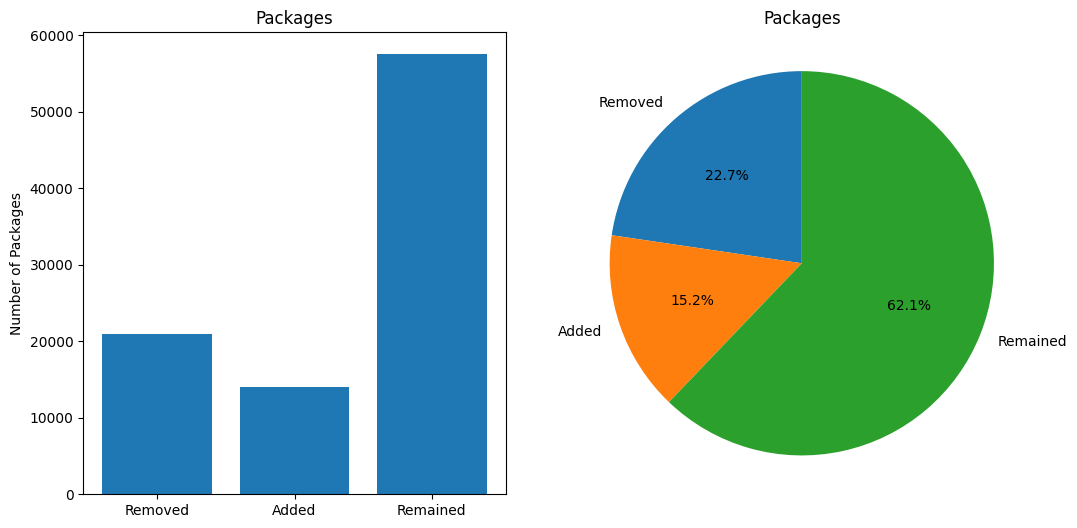

The biggest package from focal is:  insighttoolkit4-python3 , with size:  0.0 MB
The biggest package from jammy is:  dotnet-sdk-6.0-source-built-artifacts , with size:  2.0 MB


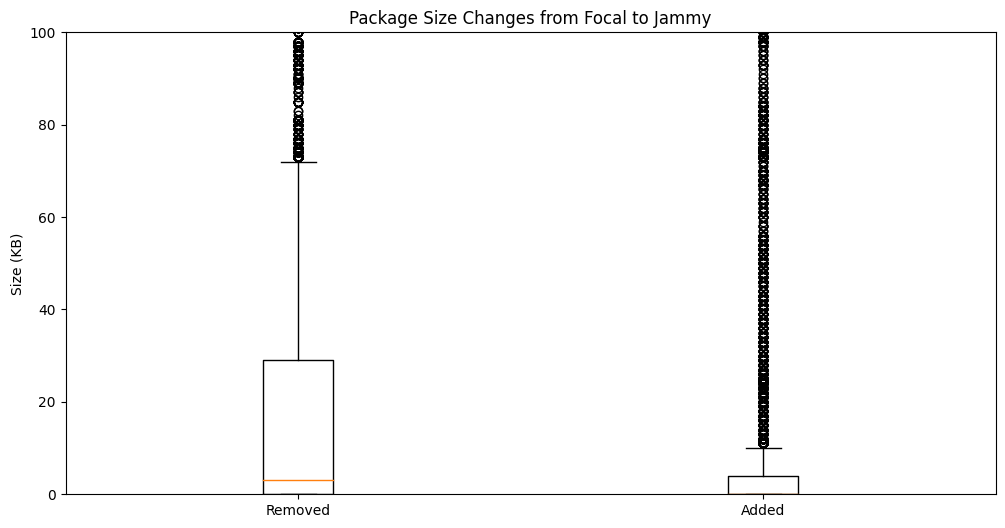

In [8]:
labels = ['Removed', 'Added', 'Remained']
sizes = [focal_removed_packages.shape[0], jammy_new_packages.shape[0], focal.shape[0] - focal_removed_packages.shape[0]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(labels, sizes)
ax1.set_title('Packages')
ax1.set_ylabel('Number of Packages')

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Packages')

plt.show()

removed_package_sizes = focal_removed_packages["Installed-Size"] // (1024)
added_package_sizes = jammy_new_packages["Installed-Size"] // (1024)
package_size_data = [removed_package_sizes, added_package_sizes]

focal_max_size_package = focal_removed_packages.loc[focal_removed_packages["Installed-Size"].idxmax()]
print("The biggest package from focal is: ", focal_max_size_package["Package"], ", with size: ", focal_max_size_package["Installed-Size"] // (1024 * 1024), "MB")

jammy_max_size_package = jammy_new_packages.loc[jammy_new_packages["Installed-Size"].idxmax()]
print("The biggest package from jammy is: ", jammy_max_size_package["Package"], ", with size: ", jammy_max_size_package["Installed-Size"] // (1024 * 1024), "MB")

fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(package_size_data)
ax.set_title('Package Size Changes from Focal to Jammy')
ax.set_ylabel('Size (KB)')
ax.set_xticklabels(['Removed', 'Added'])

ax.set_ylim(bottom=0, top=100)

plt.show()

#### 5.3 Jammy to Kinetic

In [9]:
jammy_removed_packages = jammy[~jammy["Package"].isin(kinetic["Package"])]
jammy_removed_packages = jammy_removed_packages.reset_index(drop=True)

kinetic_new_packages = kinetic[~kinetic["Package"].isin(jammy["Package"])]
kinetic_new_packages = kinetic_new_packages.reset_index(drop=True)

print("-------------------------- Packages --------------------------")

print("How much packages were removed from jammy to kinetic? :", jammy_removed_packages.shape[0])

print("How much packages were added from jammy to kinetic? :", kinetic_new_packages.shape[0])

print("How many packages remained from jammy to kinetic? :", jammy.shape[0] - jammy_removed_packages.shape[0])

print("\n-------------------------- Size --------------------------")

print("How much weight was removed from jammy to kinetic? :", jammy_removed_packages["Installed-Size"].sum() // (1024 * 1024), "MB")

print("How much weight was added from jammy to kinetic? :", kinetic_new_packages["Installed-Size"].sum() // (1024 * 1024), "MB")

print("How much weight gain was there from jammy to kinetic? :", (kinetic_new_packages["Installed-Size"].sum() - jammy_removed_packages["Installed-Size"].sum()) // (1024 * 1024), "MB")

print("Which is the average weight of the removed packages from jammy to kinetic? :", jammy_removed_packages["Installed-Size"].mean() // (1024), "KB")

print("Which is the average weight of the added packages from jammy to kinetic? :", kinetic_new_packages["Installed-Size"].mean() // (1024), "KB")

print("Which is the average weight gain of the packages from jammy to kinetic? :", (kinetic_new_packages["Installed-Size"].mean() - jammy_removed_packages["Installed-Size"].mean()) // (1024), "KB")

print("\n-------------------------- Check --------------------------")

print("Do all this metrics make sense? :", ((kinetic_new_packages["Installed-Size"].mean() * kinetic_new_packages.shape[0]) - (jammy_removed_packages["Installed-Size"].mean() * jammy_removed_packages.shape[0])) // (1024 * 1024) == (kinetic_new_packages["Installed-Size"].sum() - jammy_removed_packages["Installed-Size"].sum()) // (1024 * 1024))

-------------------------- Packages --------------------------
How much packages were removed from jammy to kinetic? : 6619
How much packages were added from jammy to kinetic? : 4118
How many packages remained from jammy to kinetic? : 64937

-------------------------- Size --------------------------
How much weight was removed from jammy to kinetic? : 239.0 MB
How much weight was added from jammy to kinetic? : 136.0 MB
How much weight gain was there from jammy to kinetic? : -104.0 MB
Which is the average weight of the removed packages from jammy to kinetic? : 37.0 KB
Which is the average weight of the added packages from jammy to kinetic? : 33.0 KB
Which is the average weight gain of the packages from jammy to kinetic? : -4.0 KB

-------------------------- Check --------------------------
Do all this metrics make sense? : True


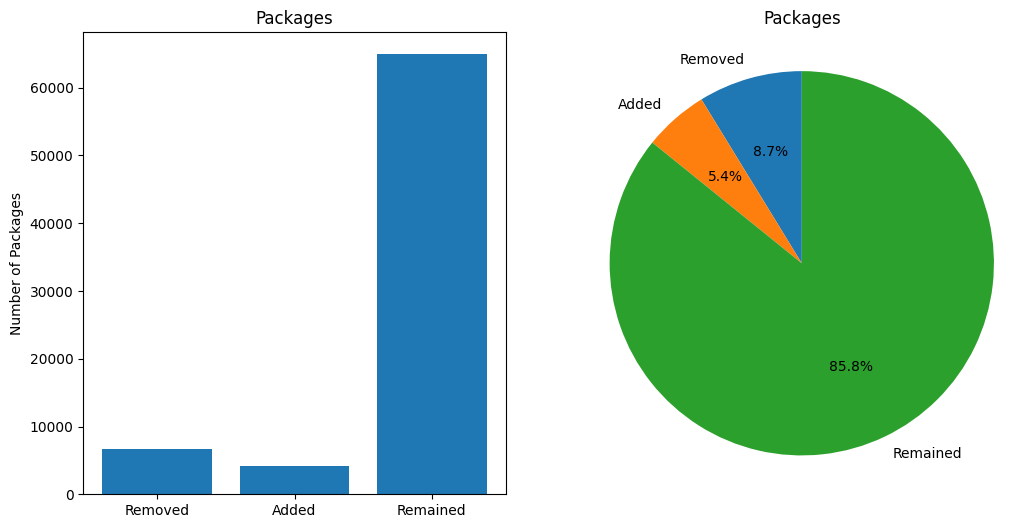

The biggest package from jammy is:  linux-modules-6.1.0-1006-oem , with size:  602.0 KB
The biggest package from kinetic is:  google-android-ndk-r21e-installer , with size:  3.0 MB


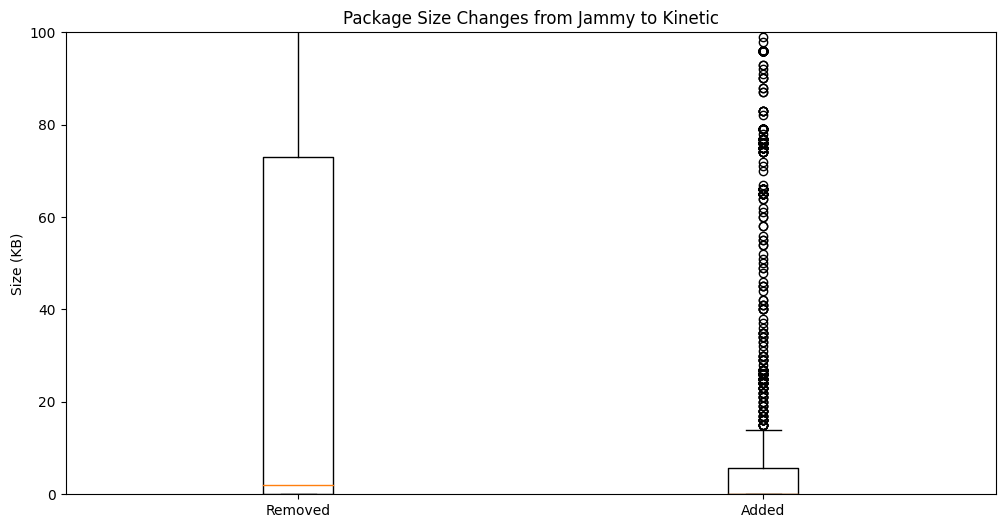

In [10]:
labels = ['Removed', 'Added', 'Remained']
sizes = [jammy_removed_packages.shape[0], kinetic_new_packages.shape[0], jammy.shape[0] - jammy_removed_packages.shape[0]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(labels, sizes)
ax1.set_title('Packages')
ax1.set_ylabel('Number of Packages')

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Packages')

plt.show()

removed_package_sizes = jammy_removed_packages["Installed-Size"] // (1024)
added_package_sizes = kinetic_new_packages["Installed-Size"] // (1024)
package_size_data = [removed_package_sizes, added_package_sizes]

jammy_max_size_package = jammy_removed_packages.loc[jammy_removed_packages["Installed-Size"].idxmax()]
print("The biggest package from jammy is: ", jammy_max_size_package["Package"], ", with size: ", jammy_max_size_package["Installed-Size"] // (1024), "KB")

kinetic_max_size_package = kinetic_new_packages.loc[kinetic_new_packages["Installed-Size"].idxmax()]
print("The biggest package from kinetic is: ", kinetic_max_size_package["Package"], ", with size: ", kinetic_max_size_package["Installed-Size"] // (1024 * 1024), "MB")

fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(package_size_data)
ax.set_title('Package Size Changes from Jammy to Kinetic')
ax.set_ylabel('Size (KB)')
ax.set_xticklabels(['Removed', 'Added'])

ax.set_ylim(bottom=0, top=100)

plt.show()